In [107]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
from tqdm import tqdm

class Record:
    def __init__(self, T_0, notes_to_choose = 5):
        self.notes_to_choose = notes_to_choose
        self.transitions = [T_0]
        self.trajectories = []
    
    
def hamming_distance(chaine1, chaine2):
    return sum(c1 != c2 for c1, c2 in zip(chaine1, chaine2))

class Evaluator():
    def __init__(self):
        self.reward_history = []
        
    def give_reward(self, guess, label):
        if guess == label:
            return 1
        else:
            return 0
        
    def give_reward_distance(self, states, actions):
        if hamming_distance(states,actions) == 0:
            return 1
        else:
            return 0
        
class Agent():
    def __init__(self, notes_to_choose, gamma=1., lr=1e-1,ep=0.01 ):
        self.n_actions = notes_to_choose
        self.states = notes_to_choose
        self.q = np.zeros((notes_to_choose, notes_to_choose))
        self.n = np.zeros((notes_to_choose, notes_to_choose))
        
        self.epsilon = ep
        self.gamma = gamma
        self.lr=lr
        
    def give_action(self, state):
        if np.random.random()<self.epsilon:
            return np.random.choice(range(self.n_actions), 1)[0]
        else:
            qs = self.q[:,state]
            qs = np.where( qs == np.max(qs) )[0]
            return np.random.choice(qs, 1)[0]
            

    def q_learn(self, ts):
        ### q-learn
        for interaction in ts:
            s, a, r, ns = interaction
            self.n[s,a]+=1
            lr = 1/self.n[s,a]
            #lr=0.1
            if ns != -1:
                self.q[s,a] += (r+ (agent.gamma*np.max(self.q[ns,:]) -  self.q[s,a]))*lr
            else:
                self.q[s,a] += (r-self.q[s,a])*lr

100%|██████████| 30000/30000 [00:04<00:00, 7440.79it/s]


Text(0, 0.5, 'Cumulative reward ($\\frac{Success}{TOTAL}$)')

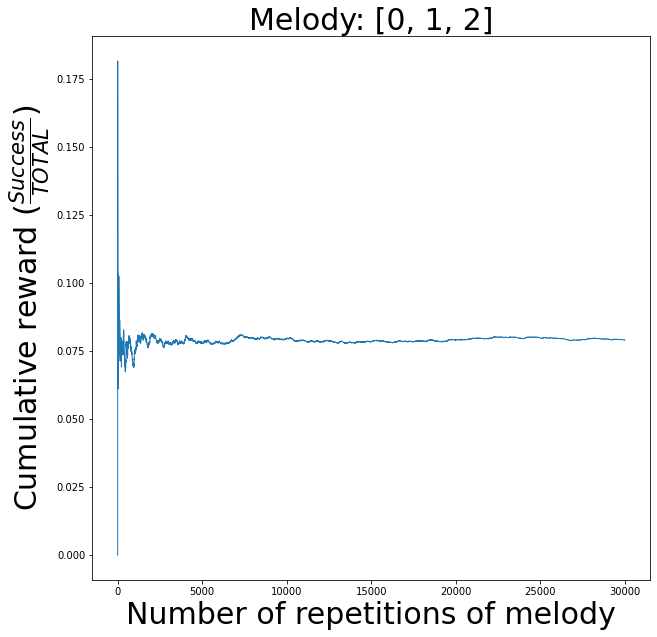

In [112]:
evaluator = Evaluator()
agent = Agent(3, gamma=.9, ep=0.3)
melody = [0,1,2]

for episode in tqdm(range(3*10**4)):
    state = 0
    ts=[]
    states, actions = [], []
    for ind,note in enumerate(melody):
        states.append(state)
        action = agent.give_action(state)
        actions.append(action)
        if ind!=len(melody)-1:
            next_state = action
            reward = 0
        else:
            next_state = -1
            reward = evaluator.give_reward_distance(states, melody)
            evaluator.reward_history.append(reward)
        ts.append([state, action, reward, next_state])
        state = action
        
    agent.q_learn(ts)

plt.figure(figsize=(10,10))
plt.title("Melody: {}".format(melody),size=30)
plt.plot(np.cumsum(evaluator.reward_history)/np.arange(1,len(evaluator.reward_history)+1), linewidth=1)
plt.xlabel("Number of repetitions of melody",size=30)
plt.ylabel("Cumulative reward ("+r'$\frac{Success}{TOTAL}$'+")",size=30)
#plt.ylim([0,1])

100%|██████████| 1000000/1000000 [04:35<00:00, 3632.13it/s]


Text(0, 0.5, 'Cumulative reward ($\\frac{Success}{TOTAL}$)')

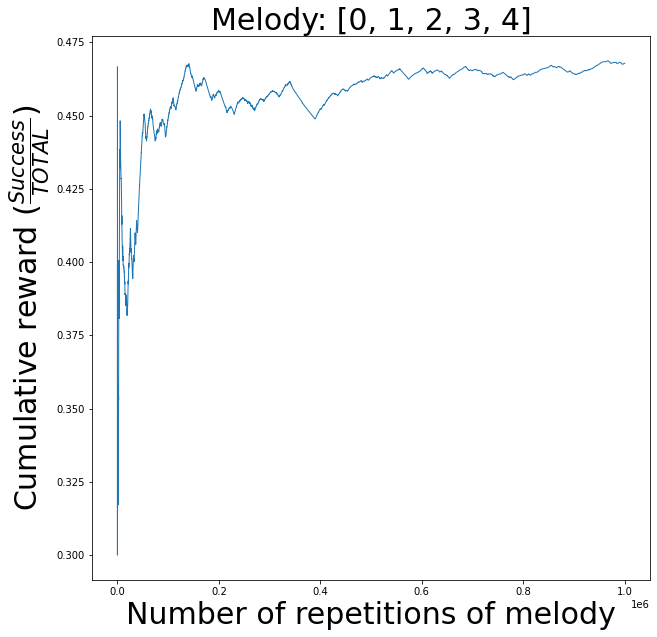

In [75]:


for episode in tqdm(range(10**6)):
    state = 0
    ts=[]
    states, actions = [], []
    for ind,note in enumerate(melody):
        states.append(state)
        action = agent.give_action(state)
        actions.append(action)
        if ind!=len(melody)-1:
            next_state = action
            reward = 0
        else:
            next_state = -1
            reward = evaluator.give_reward_distance(states, melody)
            evaluator.reward_history.append(reward)
        ts.append([state, action, reward, next_state])
        state = next_state
        
    agent.q_learn(ts)

plt.figure(figsize=(10,10))
plt.title("Melody: {}".format(melody),size=30)
plt.plot(np.cumsum(evaluator.reward_history)/np.arange(1,len(evaluator.reward_history)+1), linewidth=1)
plt.xlabel("Number of repetitions of melody",size=30)
plt.ylabel("Cumulative reward ("+r'$\frac{Success}{TOTAL}$'+")",size=30)
#plt.ylim([0,1])

100%|██████████| 10000/10000 [00:02<00:00, 4700.07it/s]


Text(0, 0.5, 'Cumulative reward ($\\frac{Success}{TOTAL}$)')

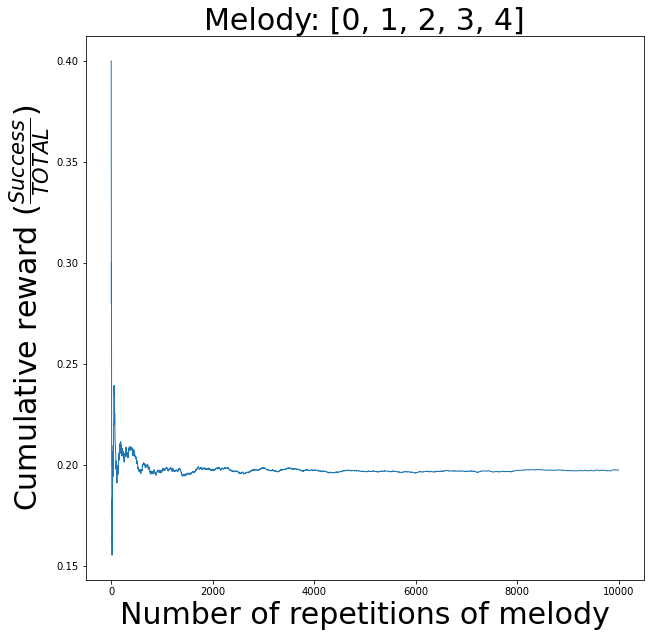

In [71]:
evaluator = Evaluator()
agent = Agent(5, gamma=1.0, ep=0.01)
melody = [0,1,2,3,4]

for episode in tqdm(range(10**4)):
    state = 0
    ts=[]
    states, actions = [], []
    for ind,note in enumerate(melody):
        state=note
        states.append(state)
        action = agent.give_action(state)
        actions.append(action)
        if ind!=len(melody)-1:
            next_state = action
            reward = 0
        else:
            next_state = -1
            reward = evaluator.give_reward_distance(actions, states)
            evaluator.reward_history.append(reward)
        ts.append([state, action, reward, next_state])
    agent.q_learn(ts)

plt.figure(figsize=(10,10))
plt.title("Melody: {}".format(melody),size=30)
plt.plot(np.cumsum(evaluator.reward_history)/np.arange(1,len(evaluator.reward_history)+1), linewidth=1)
plt.xlabel("Number of repetitions of melody",size=30)
plt.ylabel("Cumulative reward ("+r'$\frac{Success}{TOTAL}$'+")",size=30)
#plt.ylim([0,1])

In [65]:
actions

[2, 3, 0, 1, 4]